# Predicting Player Position

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

sns.set_style("whitegrid")

In [2]:
data = pd.read_excel("./data/bballTrainingData.xlsx", sheet_name='data')
data_train = pd.read_excel("./data/bballTrainingData.xlsx", sheet_name='dataTrain')
data_test = pd.read_excel("./data/bballTrainingData.xlsx", sheet_name='dataTest')

A kNN model with n_neighbors = 1 uses the class of the single closest "neighbor" to classify a new observation. The model's performance may improve if the value of k is increased – that is, it uses the most common class of several neighbors, instead of just one.
We can change the value of k by setting the "n_neighbors" property when creating the kNN model.
Using 5 nearest neighbors reduced the loss, but the model still misclassifies over 50% of the test data set.
Many machine learning methods use the distance between observations as a similarity measure. Smaller distances indicate more similar observations.
In the basketball data set, the statistics have different units and scales, which means some statistics will contribute more than others to the distance calculation. Centering and scaling each statistic makes them contribute more evenly.
We can normalize the data to have mean 0 and standard deviation 1.

In [3]:
x_train, x_test = data_train.iloc[:, 1:], data_test.iloc[:, 1:]
x_train_scaled, x_test_scaled = (x_train - x_train.mean()) / x_train.std(), (x_test - x_test.mean()) / x_test.std()

In [4]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, data_train.iloc[:, 0])

KNeighborsClassifier()

Calculate misclassification rate.

In [5]:
model_loss = 1 - knn_model.score(x_test_scaled, data_test.iloc[:, 0])
model_loss

0.3626373626373627

Display a confusion chart.

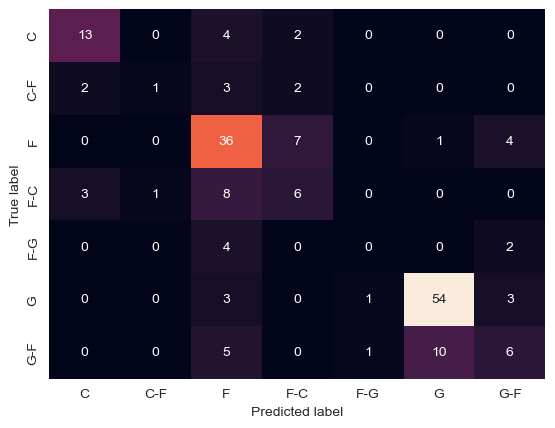

In [6]:
predicted_pos = knn_model.predict(x_test_scaled)
cnfs_mtrx = confusion_matrix(data_test.iloc[:, 0], predicted_pos)
pos_categories = pd.Categorical(data.pos).categories

plt.figure()
sns.heatmap(pd.DataFrame(cnfs_mtrx, columns=pos_categories, index=pos_categories), annot=True, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()